# Project: Finding Heavy Traffic Indicators on I-94
#### Wprowadznie
#####Cel Projektu:

W tym projekcie przeanalizowano zbiór danych dotyczących ruchu na autostradzie I-94 w Stanach Zjednoczonych. Za pomocą bibliotek pandas, matplotlib oraz seaborn zwizualizowano przyczyny ;korków na autostradzie I-94.
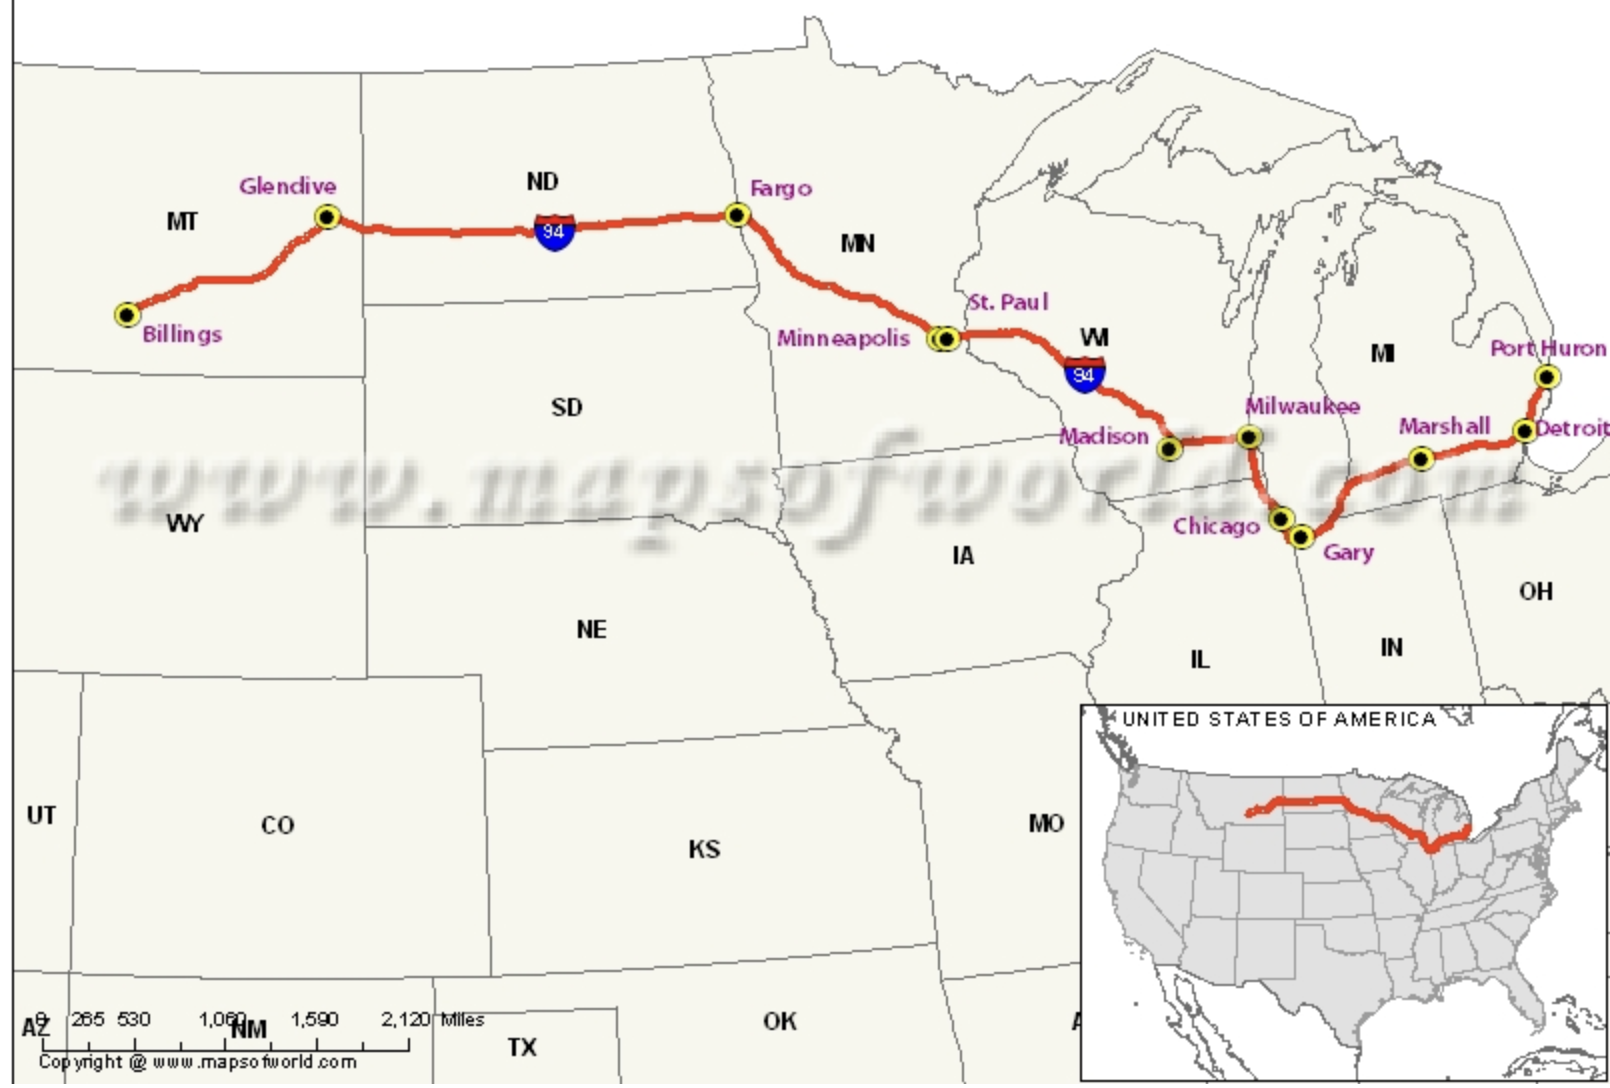

Dane zebrał John Hogue i są dostępne w  [Repozytorium UCI Machine Learnig](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

Zaczęto od importu potrzebnyuch bibilotek i przyjżenia się danym

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
i_94 = pd.read_csv('https://raw.githubusercontent.com/jamesrawlins1000/-Metro-Interstate-Traffic-Volume-Data-Set-/master/Metro_Interstate_Traffic_Volume.csv.gz', compression='gzip')
i_94.head()




,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [ ]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


W zbiorze danych znajduje się ponad 48 tysięcy rekordów, oraz występują 3 typy danych: `float64`, `int64 `i `object`. Brak  wartości `null`.

Dane zebrane zostały pomiędzy `2012-10-02 09:00:00` a `2018-09-30 23:00:00` i opisują stan ruchu oraz pogodę i okres w roku.

Należy pamietać, że natężenie ruchu `traffic_volume` pochodzi ze stacji umieszczonej pomiędzy Minneapolis a Saint Paul, czyli mniej więcej na środku i-94 *(Wprowadzenie: Mapa)*

Dodatkowo, mierzony jest wyłącznie ruch ze wschodu na zachód.

Innymi słowy, nie powinno się generalizować wyników dla całej autostrady I-94.

#### Analiza Natężenia Ruchu


In [ ]:
sns.set_theme()


Ustawiono domyślny wygląd seaborn, ze względów wizualnych :)

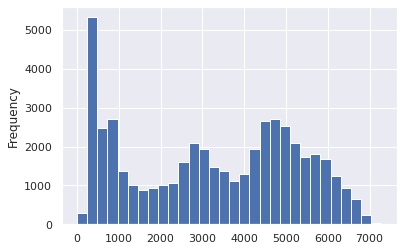

In [ ]:
i_94['traffic_volume'].plot.hist(bins = 30)

In [ ]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Maksymalna ilośc aut na godzinę wyniosła 7280, najmniej 0, a średnia ze zbioru danych to 3,260 aut na godzine.

Przeanalizowano różnice w ruchu w dzień i w nocy

#### Natężenie Ruchu: Dzień/Noc

Założono, że:

Dzień trwa od 7 AM do 7 PM

Noc trwa od 7 PM do 7 AM

In [ ]:
# zamiana kolumny date_time na obiekt datetime
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
i_94['date_time'].dt.hour.nunique()

24

In [ ]:
# dodanie kolumny hour
i_94['hour'] = i_94['date_time'].dt.hour

In [ ]:
# izolacja godzin dziennych
daytime_hours = list(range(7, 19))
i_94_daytime = i_94.loc[i_94['hour'].isin(daytime_hours)]

In [ ]:
#izolacja godzin nocnych
i_94_nighttime = i_94.loc[-(i_94['hour'].isin(daytime_hours))]

In [ ]:
#sprawdzenie
print(sorted(i_94_daytime['hour'].unique()))
print(sorted(i_94_nighttime['hour'].unique()))

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 4, 5, 6, 19, 20, 21, 22, 23]


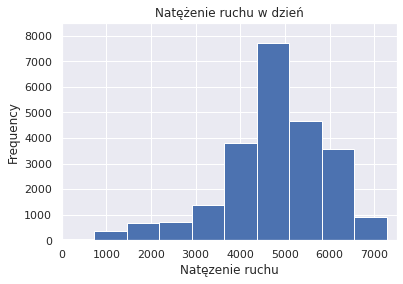

In [ ]:
i_94_daytime['traffic_volume'].plot.hist()
plt.title('Natężenie ruchu w dzień')
plt.xlabel('Natęzenie ruchu')
plt.ylim([0, 8500])
plt.xlim([0, 7500])
plt.show()

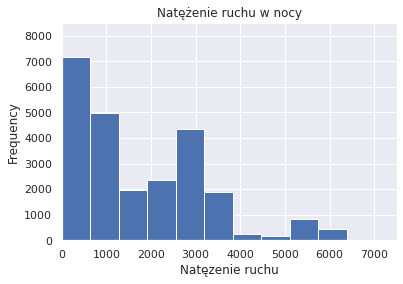

In [ ]:
i_94_nighttime['traffic_volume'].plot.hist()
plt.title('Natężenie ruchu w nocy')
plt.xlabel('Natęzenie ruchu')
plt.ylim([0, 8500])
plt.xlim([0, 7500])
plt.show()

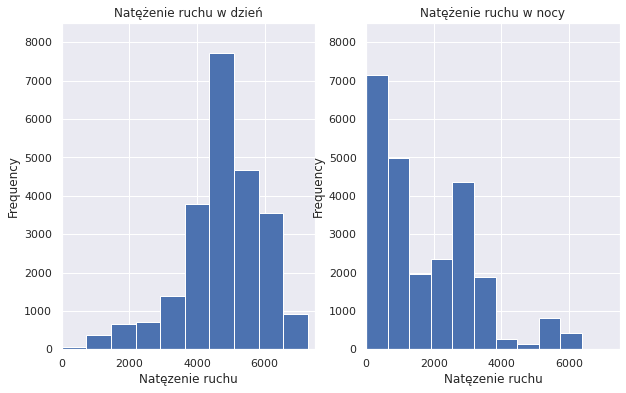

In [ ]:
#obok siebie
plt.figure(figsize = (10,6)) # Setting the figure size
plt.subplot(1,2,1)

i_94_daytime['traffic_volume'].plot.hist()
plt.title('Natężenie ruchu w dzień')
plt.xlabel('Natęzenie ruchu')
plt.ylim([0, 8500])
plt.xlim([0, 7500])

plt.subplot(1,2,2)
i_94_nighttime['traffic_volume'].plot.hist()
plt.title('Natężenie ruchu w nocy')
plt.xlabel('Natęzenie ruchu')
plt.ylim([0, 8500])
plt.xlim([0, 7500])

plt.show()

Postanowiono przyżeć sie dokładniej podstawowym statystykom z każdego z wykresów

In [ ]:
i_94_daytime.describe(include = 'all', datetime_is_numeric=True)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
count,23877,23877.000000,23877.00000,23877.000000,23877.000000,23877,23877,23877,23877.000000,23877.000000
unique,1,NaN,NaN,NaN,NaN,11,38,NaN,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN,NaN
freq,23877,NaN,NaN,NaN,NaN,8702,4892,NaN,NaN,NaN
mean,NaN,282.257596,0.53306,0.000253,53.122000,NaN,NaN,2016-01-05 00:55:02.676215552,4762.047452,12.431419
min,NaN,0.000000,0.00000,0.000000,0.000000,NaN,NaN,2012-10-02 09:00:00,0.000000,7.000000
25%,NaN,272.680000,0.00000,0.000000,5.000000,NaN,NaN,2014-02-04 10:00:00,4252.000000,9.000000
50%,NaN,283.780000,0.00000,0.000000,75.000000,NaN,NaN,2016-06-12 11:00:00,4820.000000,12.000000
75%,NaN,293.440000,0.00000,0.000000,90.000000,NaN,NaN,2017-08-14 14:00:00,5559.000000,15.000000
max,NaN,310.070000,9831.30000,0.510000,100.000000,NaN,NaN,2018-09-30 18:00:00,7280.000000,18.000000


In [ ]:
i_94_nighttime.describe(include = 'all', datetime_is_numeric=True)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
count,24327,24327.000000,24327.000000,24327.000000,24327.000000,24327,24327,24327,24327.000000,24327.000000
unique,12,NaN,NaN,NaN,NaN,11,33,NaN,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clear,sky is clear,NaN,NaN,NaN
freq,24266,NaN,NaN,NaN,NaN,7647,6773,NaN,NaN,NaN
mean,NaN,280.173600,0.139145,0.000192,45.672011,NaN,NaN,2016-01-05 20:26:34.672585984,1785.377441,10.384018
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2012-10-02 19:00:00,0.000000,0.000000
25%,NaN,271.700000,0.000000,0.000000,1.000000,NaN,NaN,2014-02-08 20:30:00,530.000000,2.000000
50%,NaN,281.379000,0.000000,0.000000,40.000000,NaN,NaN,2016-06-09 23:00:00,1287.000000,5.000000
75%,NaN,290.700000,0.000000,0.000000,90.000000,NaN,NaN,2017-08-08 20:30:00,2819.000000,20.000000
max,NaN,307.680000,55.630000,0.510000,100.000000,NaN,NaN,2018-09-30 23:00:00,6386.000000,23.000000


Najważniejszym wnioskiem jest to, że ruch w nocy jest zauważalnie mniejszy.

#### Przyczyny Natężenia związane z czasem
Przyjżano sie dokładniej różnic w natężeniu ruchu w zależności od:
- Miesiąca
- Dnia Tygodnia
- Czasu w ciągu dnia


In [ ]:
# tworzenie kolumny z miesiacami i tworzenie datasetu na jej podstawie
i_94_daytime['month'] = i_94_daytime['date_time'].dt.month
by_month = i_94_daytime.groupby('month').mean()
by_month

<ipython-input-19-3a9601dc614e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_94_daytime['month'] = i_94_daytime['date_time'].dt.month


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
month,,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727,12.386774
2,266.663789,0.004019,0.000000,51.550459,4711.198394,12.351491
3,273.619940,0.015839,0.000000,56.827811,4889.409560,12.363933
4,279.661071,0.105343,0.000000,59.221525,4906.894305,12.492278
5,289.282668,0.130863,0.000000,56.548825,4911.121609,12.478300
6,294.576068,0.271121,0.000000,48.612374,4898.019566,12.425701
7,296.785052,4.412258,0.000000,42.176619,4595.035744,12.388141
8,295.119191,0.228113,0.000000,42.556892,4928.302035,12.387604
9,292.520287,0.289807,0.000000,45.184112,4870.783145,12.401503


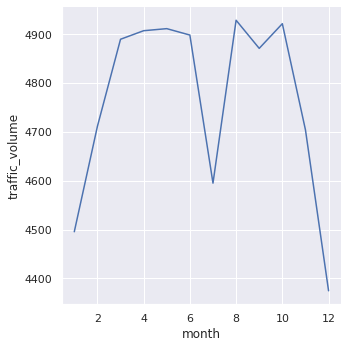

In [ ]:
sns.relplot(data = by_month, x = 'month', y = 'traffic_volume', kind = 'line')

Natężenie spada w miesiacach zimowych (Listopad - Luty) a wzrasta w cieplejszych (Marzec - Październik)


Dzień Tygodnia a natężenie ruchu

In [ ]:
# ponownie uzyto groupby()
i_94_daytime['day_of_week'] = i_94_daytime['date_time'].dt.dayofweek
by_dayofweek = i_94_daytime.groupby('day_of_week').mean()
by_dayofweek #0 to Poniedziałek a 6 to Niedziela

<ipython-input-21-8d35db526ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_94_daytime['day_of_week'] = i_94_daytime['date_time'].dt.dayofweek


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month
day_of_week,,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,12.472732,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,12.369994,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,12.453411,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,12.459739,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,12.454545,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,12.391573,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,12.415244,6.604179


Czas na wykres

(3000.0, 5500.0)

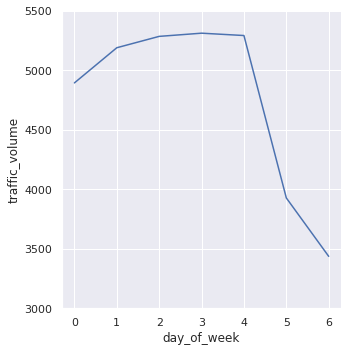

In [ ]:
sns.relplot(data = by_dayofweek, x = 'day_of_week', y = 'traffic_volume', kind = 'line')
plt.ylim([3000,5500])

Można zauważyć że ruch rośnie od poczatku tygodnia do piątku, po czym na weekend spada.

In [ ]:
# Podział na dni pracujace i weekendy
working_days = i_94_daytime[i_94_daytime['day_of_week'] <= 4] #0-4 dni pracujace
weekend = i_94_daytime[i_94_daytime['day_of_week'] >= 5] # >5 weekendy

In [ ]:
# Stworzenie 2 osobnych zbiorów danych
by_hour_workingdays = working_days.groupby('hour').mean()
by_hour_workingdays.reset_index(inplace=True)
by_hour_workingdays

,hour,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week
0,7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
1,8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
2,9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
3,10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
4,11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957
5,12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286
6,13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988
7,14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852
8,15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,1.962563
9,16,284.399011,0.118180,0.000632,54.444132,6189.473647,6.580464,1.995081


In [ ]:
by_hour_weekends = weekend.groupby('hour').mean()
by_hour_weekends.reset_index(inplace = True)
by_hour_weekends

,hour,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week
0,7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656
1,8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322
2,9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201
3,10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436
4,11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892
5,12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694
6,13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288
7,14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000
8,15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,5.506422
9,16,284.755487,0.145894,0.000000,53.630088,4339.693805,6.566372,5.507965


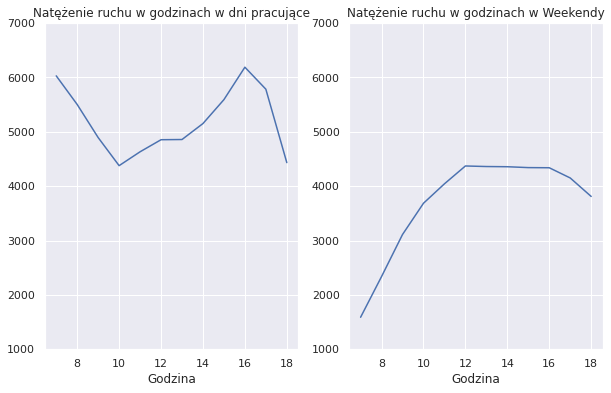

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(by_hour_workingdays['hour'], by_hour_workingdays['traffic_volume'])
plt.ylim([1000, 7000])
plt.title('Natężenie ruchu w godzinach w dni pracujące')
plt.xlabel('Godzina')

plt.subplot(1,2,2)
plt.plot(by_hour_weekends['hour'], by_hour_weekends['traffic_volume'])
plt.ylim([1000, 7000])
plt.title('Natężenie ruchu w godzinach w Weekendy')
plt.xlabel('Godzina')
plt.show()

Największy ruch w dni pracujące występuje o 7 AM i 4 PM

Natomiast w weekendy o 12 PM i 4 PM

Zapewne jest to zwiazane z jazdą i powrotem z pracy.

#### Przyczyny natężenia zwiazane z pogodą

Kategorie `temp`, `rain_1h`, `snow_1h`, `clouds_all`, . związane z pogodą są zapisane w sposób numeryczny. Postanowiono sprawdzić ich korelacje z natężeniem ruchu na I94

Usuniemy kategorie niezwiązane z pogodą z wcześniej utworzogo zbioru danych `i_94_daytime`

In [ ]:
weather_corr_traffic = i_94_daytime.corr()['traffic_volume'].drop(['traffic_volume','day_of_week','month', 'hour'], axis = 0)
weather_corr_traffic

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

Temperatura wydaje sie mieć najwyższą korelacje z powyższych zmiennych.

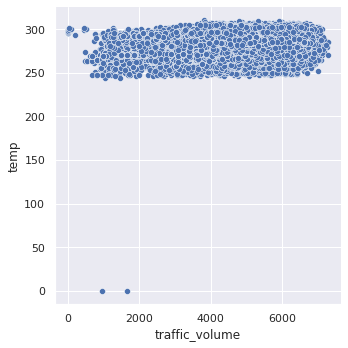

In [ ]:
sns.relplot(data = i_94_daytime, x = 'traffic_volume', y = 'temp')

2 obserwacje są zerowe

(220.0, 340.0)

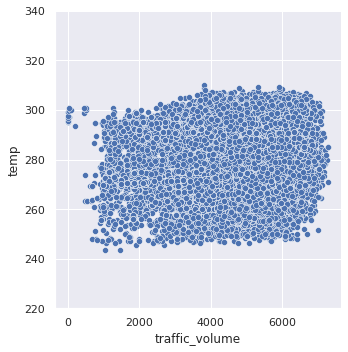

In [ ]:
sns.relplot(data = i_94_daytime, x = 'traffic_volume', y = 'temp')
plt.ylim([220,340])

Przyjrzyjmy się danym skategoryzowanym związanym z pogodą `weather_main`i `weather_description`

In [ ]:
i_94_daytime['weather_main'].value_counts()

Clouds          8702
Clear           5744
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: weather_main, dtype: int64

Przegrupujmy nasze dane względem weather_main

In [ ]:
by_weather_main = i_94_daytime.groupby('weather_main').mean()
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,day_of_week
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,12.404248,6.490599,3.138928
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,12.911974,6.393243,3.005631
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,12.308041,7.105323,2.934315
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967,6.646409,2.798343
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626,5.832134,2.754197
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,11.078288,6.734285,2.895102
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,12.642379,6.774023,2.914467
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,13.166667,6.833333,2.416667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,12.153370,6.374828,2.750344


In [ ]:
i_94_daytime['weather_description'].value_counts()

sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain    

In [ ]:
by_weather_description = i_94_daytime.groupby('weather_description').mean()
by_weather_description.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,day_of_week
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,14.000000,7.000000,2.000000
Sky is Clear,293.232549,0.000000,0.0,0.000000,4919.009390,12.453052,7.557512,2.895540
broken clouds,282.372927,0.000000,0.0,72.635875,4824.130326,12.811314,6.675260,2.998210
drizzle,283.573777,0.145072,0.0,88.589928,4737.330935,11.697842,7.244604,3.028777
few clouds,284.272965,0.000000,0.0,19.391951,4839.818023,12.633421,6.159230,2.977253


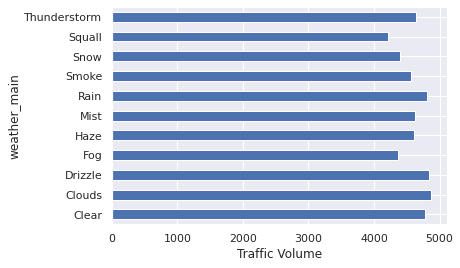

In [ ]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.show()

Na powyższym wykresie można zauważyć że największy ruch był przy dnaich z przewagą chmur, to sprawiło złe warunki na drodze.

- Przelotny śnieg i lekki deszcz ze śniegiem wydają się być opisami pogody towarzyszącymi największemu zarejestrowanemu natężeniu ruchu.